## 주성분 분석
- (차원축소)
- 여기서 차원은 3차원 -> 2차원의 차원이 아니라
- n개짜리의 특성을 차원이라고도 함
- 비슷한 경향성을 띄는 두개의 특성을 하나로 합치는 것 -> 특성이 줄어듦
- 벡터(방향성을 가진 선)

In [2]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 10000개짜리 특성을 50으로 줄여 -> 주성분 50개 가져와
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
pca.components_.shape # 300장짜리가 50...? 2차원인데 왜때문에 300장..?

(50, 10000)

In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

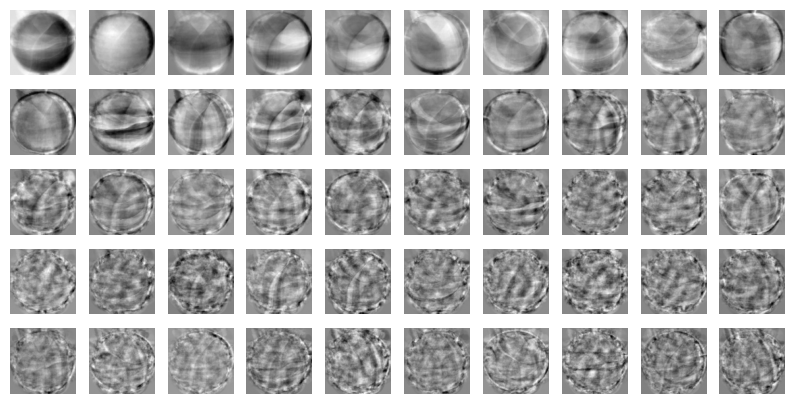

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 현재 10000개짜리 1차원이어서...?

In [11]:
fruits_pca = pca.transform(fruits_2d)

fruits_pca.shape

(300, 50)

In [13]:
# 압축 -> 원본데이터로

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


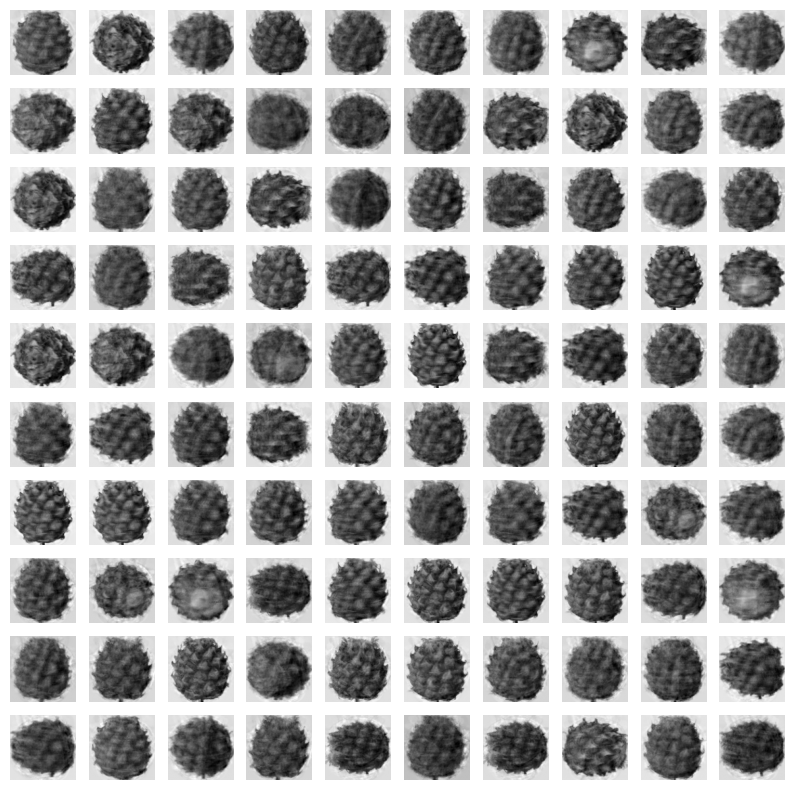

In [15]:
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[100:200])

In [19]:
np.sum(pca.explained_variance_ratio_)
# 원본데이터 몇퍼센트까지 썼는지

np.float64(0.9215206198198761)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [23]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.27958751, 0.24165106, 0.26289701, 0.26162028, 0.28034306]), 'score_time': array([0.00265169, 0.00306296, 0.0030179 , 0.00282383, 0.0036552 ]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [25]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.01678371, 0.01617193, 0.01672482, 0.01822782, 0.03323555]), 'score_time': array([0.00132632, 0.00086045, 0.00117469, 0.00132918, 0.00114059]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [28]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components

0.5

In [29]:
fruits_pca = pca.transform(fruits_2d)
fruits_2d.shape

(300, 10000)

In [31]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

{'fit_time': array([0.04780817, 0.03372002, 0.03277326, 0.02344751, 0.04815888]),
 'score_time': array([0.00105953, 0.00066829, 0.0006628 , 0.00072098, 0.00069141]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [35]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [37]:
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

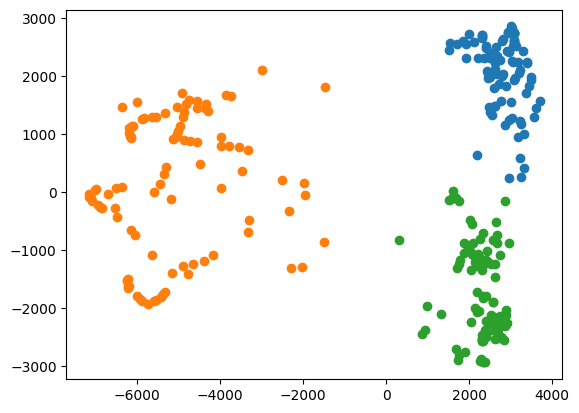

In [40]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:, 1])

#### 우리가 가진 여러개의 특성 중 결이 비슷한 친구를 하나로 묶어서 수치화